In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])

blob_std =np.array([0.3,0.3,0.1,0.1,0.1])

X,y = make_blobs (n_samples = 2000, centers = blob_centers, cluster_std = blob_std, random_state = 7)

k =5
kmeans =KMeans(n_clusters =k, random_state = 42 ,n_init = 20)
y_pred = kmeans.fit_predict(X)
y_pred[:5]

array([1, 4, 0, 4, 4], dtype=int32)

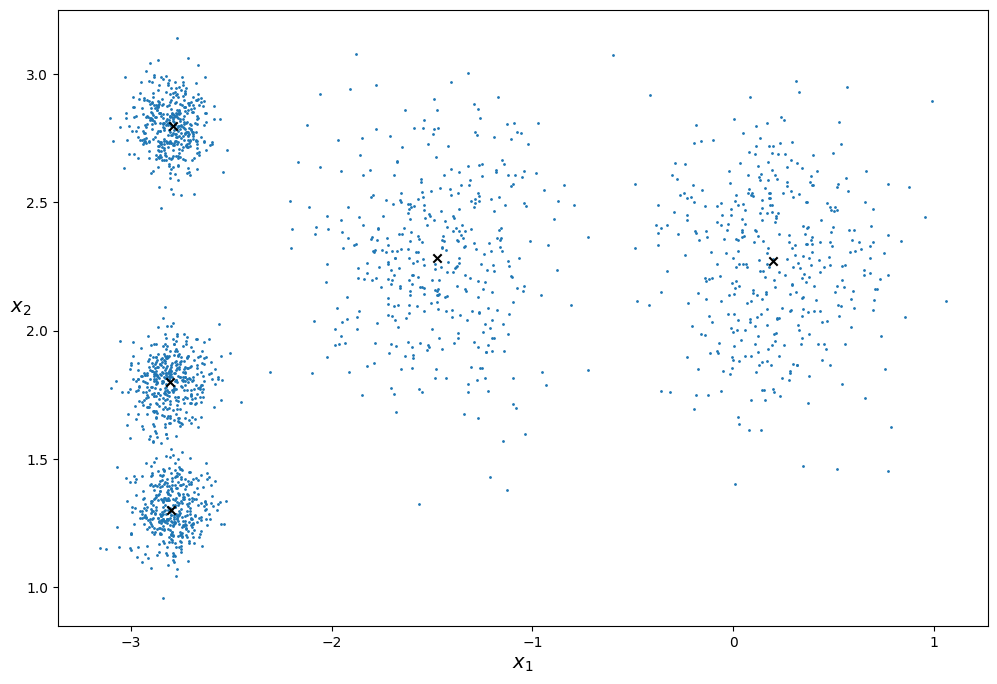

In [ ]:
import matplotlib.pyplot as plt
def plot_clusters(X, y=None):
    plt.figure(figsize =(12, 8))
    plt.scatter(X[:,0], X[:,1], c = y, s =1)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c ='black', marker = 'x')
    plt.xlabel("$x_1$",fontsize = 14)
    plt.ylabel("$x_2$", fontsize =14, rotation = 0)
plot_clusters(X)
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 0.19897131,  2.26931299],
       [-2.80037642,  1.30082566],
       [-1.47390895,  2.28362279],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

In [ ]:
kmeans.labels_

array([1, 4, 0, ..., 3, 0, 4], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
import numpy as np

X_new = np.array([[0,2], [3, 2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

In [ ]:
kmeans.transform(X_new)

array([[0.33484185, 2.88633901, 1.50094952, 2.9042344 , 2.81093633],
       [2.81394584, 5.84236351, 4.48289004, 5.84739223, 5.80730058],
       [3.28135962, 1.71086031, 1.68586779, 0.29040966, 1.21475352],
       [3.20727828, 1.21567622, 1.54135427, 0.36159148, 0.72581411]])

In [ ]:
good_init = np.array([[-3, 3],[-3, 2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters =5, init = good_init, n_init = 1, random_state= 42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [ ]:
kmeans.inertia_

160.621474224147

In [ ]:
kmeans.score(X)

-160.62147422414697

In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, random_state = 42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [ ]:
minibatch_kmeans.inertia_

160.67686862668893

In [ ]:
kmeans_per_k = [KMeans(n_clusters = k).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

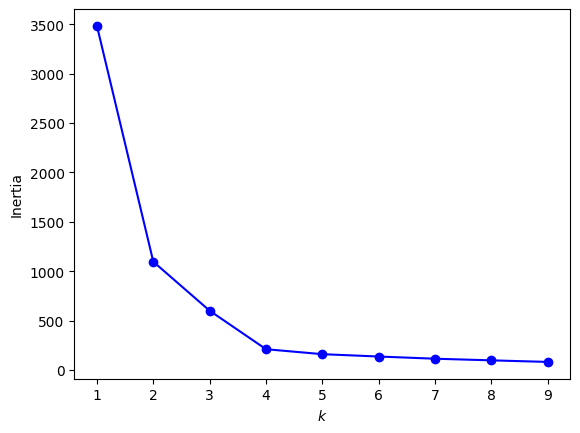

In [ ]:
plt.plot(range(1,10), inertias, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

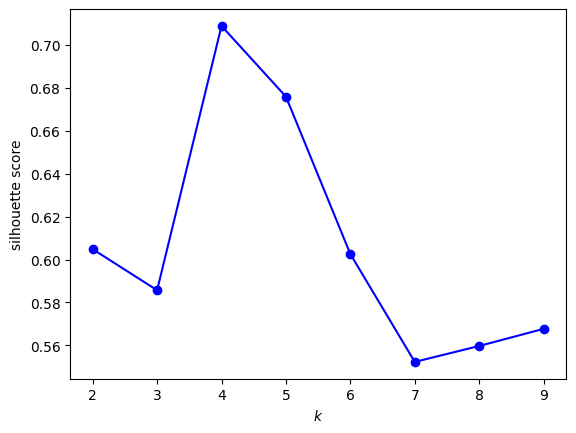

In [ ]:
plt.plot(range(2,10),silhouette_scores, 'bo-' )
plt.xlabel('$k$')
plt.ylabel('silhouette score')
plt.show()

In [ ]:
import urllib.request
from pathlib import Path

IMAGES_PATH = Path() /"images" /"unsupervised_learning"
IMAGES_PATH.mkdir(parents = True , exist_ok =True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"

filepath = IMAGES_PATH /filename

if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url,filepath)

In [ ]:
filepath

PosixPath('images/unsupervised_learning/ladybug.png')

In [ ]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

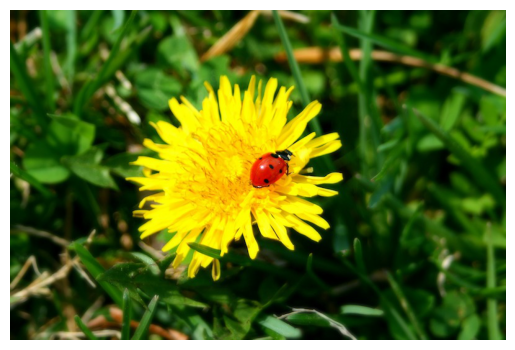

In [ ]:
plt.imshow(image)
plt.axis('off');

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters = 8, random_state = 42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [ ]:
X.shape

(426400, 3)

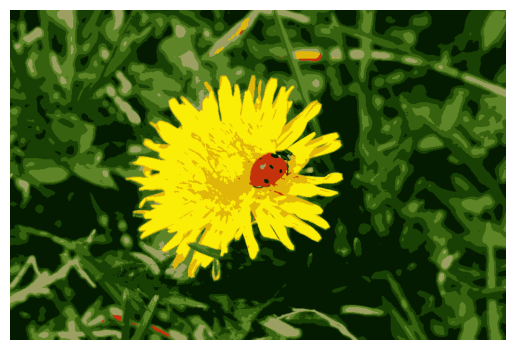

In [ ]:
plt.imshow(segmented_img/255)
plt.axis('off');

In [ ]:
#Semi-Supervised learning
from sklearn.datasets import load_digits
np.random.seed(42)
X_digits , y_digits = load_digits(return_X_y = True)
X_train,  y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test =X_digits[1400:], y_digits[1400:]


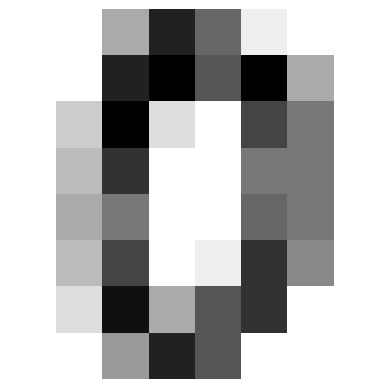

In [ ]:
plt.imshow(X_train[0].reshape(8,8), cmap = 'binary')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)


0.7581863979848866

In [ ]:
lon_reg_full = LogisticRegression(max_iter = 10_000)
lon_reg_full.fit(X_train, y_train)
lon_reg_full.score(X_test, y_test)

0.9093198992443325